(appendix)=
# Appendix



 


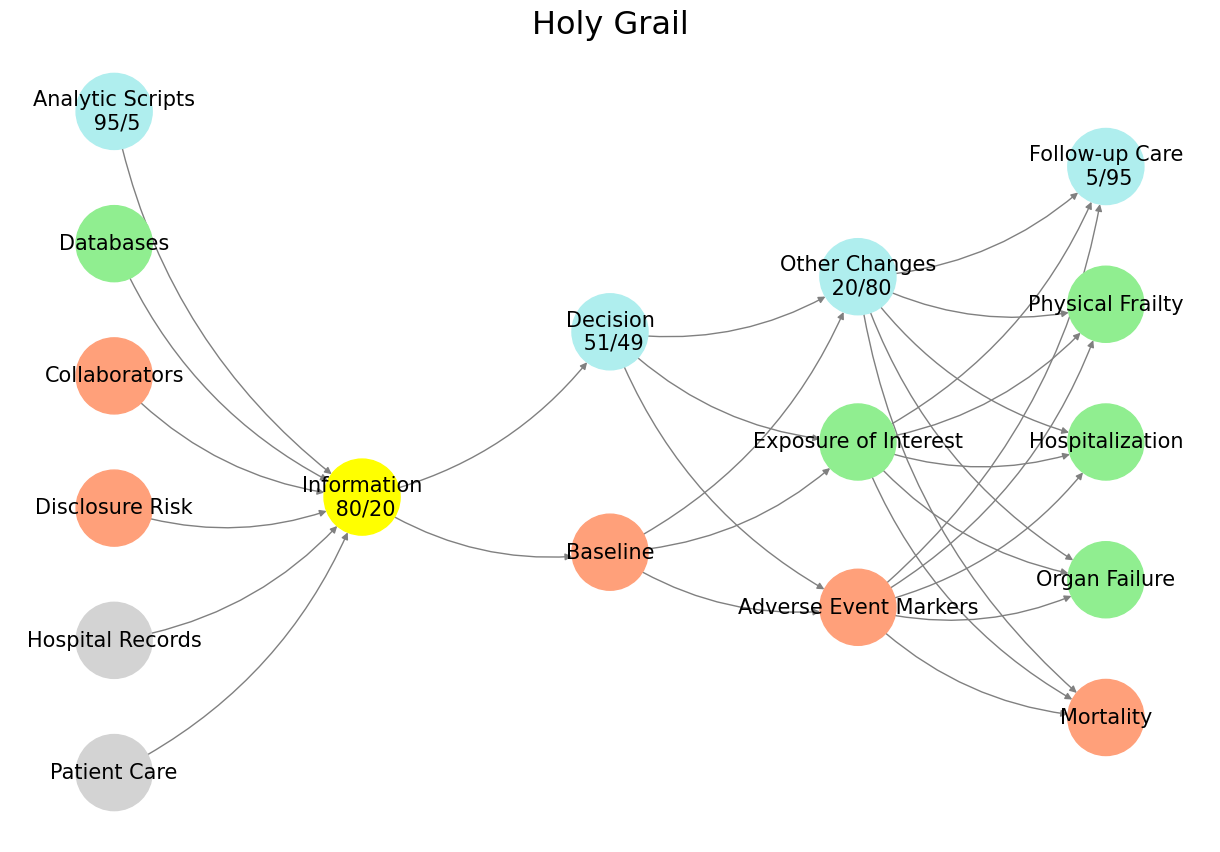

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network fractal
def define_layers():
    return {
        'Suis': ['Patient Care', 'Hospital Records', 'Disclosure Risk', 'Collaborators', 'Databases', 'Analytic Scripts\n 95/5', ], # Static
        'Voir': ['Information\n 80/20'],  
        'Choisis': ['Baseline', 'Decision\n 51/49'],  
        'Deviens': ['Adverse Event Markers', 'Exposure of Interest', 'Other Changes\n 20/80'],  
        "M'èléve": ['Mortality', 'Organ Failure',  'Hospitalization', 'Physical Frailty', 'Follow-up Care\n 5/95']  
    }

# Assign colors to nodes
def assign_colors():
    color_map = { # Dynamic
        'yellow': ['Information\n 80/20'],  
        'paleturquoise': ['Analytic Scripts\n 95/5', 'Decision\n 51/49', 'Other Changes\n 20/80', 'Follow-up Care\n 5/95'],  
        'lightgreen': ['Databases', 'Exposure of Interest', 'Organ Failure', 'Physical Frailty', 'Hospitalization'],  
        'lightsalmon': [
            'Disclosure Risk', 'Collaborators', 'Baseline',  
            'Adverse Event Markers', 'Mortality'
        ],
    }
    return {node: color for color, nodes in color_map.items() for node in nodes}

# Calculate positions for nodes
def calculate_positions(layer, x_offset):
    y_positions = np.linspace(-len(layer) / 2, len(layer) / 2, len(layer))
    return [(x_offset, y) for y in y_positions]

# Create and visualize the neural network graph
def visualize_nn():
    layers = define_layers()
    colors = assign_colors()
    G = nx.DiGraph()
    pos = {}
    node_colors = []

    # Add nodes and assign positions
    for i, (layer_name, nodes) in enumerate(layers.items()):
        positions = calculate_positions(nodes, x_offset=i * 2)
        for node, position in zip(nodes, positions):
            G.add_node(node, layer=layer_name)
            pos[node] = position
            node_colors.append(colors.get(node, 'lightgray'))   

    # Add edges (automated for consecutive layers)
    layer_names = list(layers.keys())
    for i in range(len(layer_names) - 1):
        source_layer, target_layer = layer_names[i], layer_names[i + 1]
        for source in layers[source_layer]:
            for target in layers[target_layer]:
                G.add_edge(source, target)

    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=3000, font_size=15, connectionstyle="arc3,rad=0.2"
    )
    plt.title("Holy Grail", fontsize=23)
    plt.show()

# Run the visualization
visualize_nn()

```{figure} https://www.ledr.com/colours/white.jpg
---
width: 1
height: 1
---
This visualization encodes a hierarchical decision-making network, with **Suis → Voir → Choisis → Deviens → M’élève** capturing a structured progression from **static records to dynamic evolution**, ultimately culminating in **clinical outcomes**. The color scheme aligns with **RICHER's** dynamic layers—**paleturquoise (analytic scripts & decision layers), lightgreen (databases & exposure markers), lightsalmon (risk & mortality nodes), and yellow (informational precondition)**—while **grey nodes represent neutral or unclassified elements, acting as stabilizers or latent connectors in the system**. The **weighted distributions (e.g., 95/5, 80/20, 51/49, 20/80, 5/95)** reflect **asymmetries in signal strength, agency, and iterative selection**, mirroring an **entropy-driven neural network encoding causality within a medical epistemic frame**. The title **"Holy Grail"** was chosen for irony, aspiration, and as a reflection of a personalized ideal within the model, thus working as a provocative framing device opening up the question of what exactly is being `optimized`. Our intent is not to capture the **epistemic structure** of this neural network as a **decision-making crucible**—a layered process of filtration, iteration, and emergence—and so the title doesn't reflect **compression, thresholds, or the transformation of knowledge into decisive action**. But it just might as well achieve those things as emergent phenomena 
```